In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples = 25,n_features = 1,n_informative = 1,n_redundant = 0,
                          random_state = 82,n_clusters_per_class=1,class_sep = 0.4)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

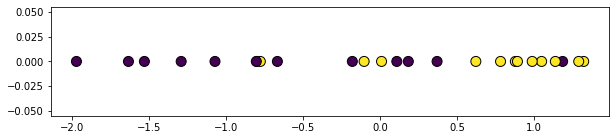

In [6]:
plt.figure(figsize = (10,2))
plt.scatter(X,np.zeros(X.shape[0]),c=y,s = 100,edgecolors = 'black')
#plt.plot([-0.15,-0.15],[-1,1])

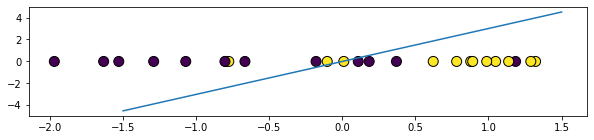

In [7]:

plt.figure(figsize = (10,2))
plt.scatter(X,np.zeros(X.shape[0]),c=y,s = 100,edgecolors = 'black')
x = np.linspace(-1.5,1.5)
plt.plot(x,3*x + 0)


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [9]:
model.fit(X,y)

LogisticRegression()

In [10]:
model_a = model.coef_[0]
model_b = model.intercept_
print("Веса: %s\nСвободный вес %s" %(model_a[0],model_b[0]))

Веса: 1.3646305522626765
Свободный вес -0.16872466405373746


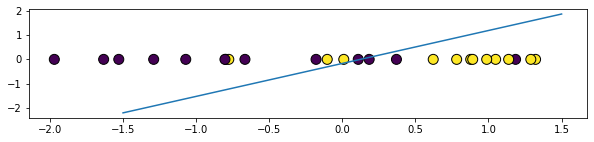

In [11]:
model_y_sk = model_a * x + model_b
plt.figure(figsize = (10,2))
plt.scatter(X,np.zeros(X.shape[0]),c = y,edgecolor = 'black',s=100)
plt.plot(x,model_a * x + model_b)


In [12]:
model.score(X,y)

0.76

In [13]:
y_pred_c1 = model.predict(X)
y_pred_c1[:5]

array([0, 1, 0, 0, 0])

In [14]:
y_pred = model_a * x + model_b
y_pred[:5]

array([-2.21567049, -2.13212168, -2.04857287, -1.96502406, -1.88147526])

### Посмотрим на результат предсказаний

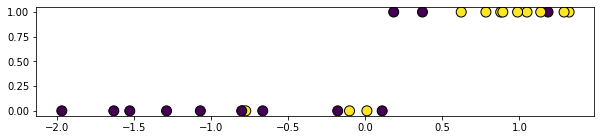

In [15]:
plt.figure(figsize = (10,2))
plt.scatter(X,y_pred_c1,c = y,edgecolor = 'black',s = 100)


In [16]:
pred_proba = model.predict_proba(X)
pred_proba[:5]

array([[0.91657342, 0.08342658],
       [0.26312646, 0.73687354],
       [0.53872599, 0.46127401],
       [0.90511853, 0.09488147],
       [0.87321038, 0.12678962]])

In [17]:
pred_proba = pred_proba[:,1]

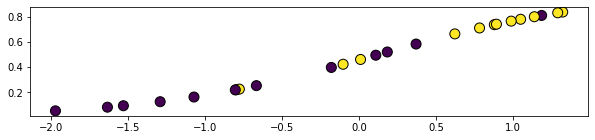

In [18]:
plt.figure(figsize = (10,2))
plt.scatter(X,pred_proba,c = y,edgecolor = 'black',s = 100)

In [19]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

$$p = \sigma(z) = \frac{1}{1 + e^{-z}}$$

(-3.5, 2.0)

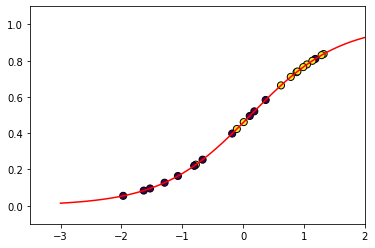

In [20]:
x = np.linspace(-3,3,100)
model_y_sk = model_a * x + model_b
plt.plot(x,sigmoid(model_y_sk),color = 'red')
plt.scatter(X,pred_proba,c = y,edgecolor = 'black',s = 50)
plt.ylim(-0.1,1.1)
plt.xlim(-3.5,2)

In [21]:
df = pd.DataFrame({'X':np.squeeze(X),
                 'y':y,
                 'pred_sk_model':sigmoid(np.squeeze(model_a * X + model_b))})
df[:5]

,X,y,pred_sk_model
0,-1.632640,0,0.083427
1,0.878264,1,0.736874
2,0.009900,1,0.461274
3,-1.529141,0,0.094881
4,-1.290402,0,0.126790


### Сигмоида дает нам вероятность принадлежности элемента к классу на основании ее линейной регрессии.

In [22]:
df['pred_sk_cl'] = (df['pred_sk_model'] > 0.5).astype(int)

In [23]:
df[:3]

,X,y,pred_sk_model,pred_sk_cl
0,-1.632640,0,0.083427,0
1,0.878264,1,0.736874,1
2,0.009900,1,0.461274,0


### вероятность правдоподобия для класса 1
### 0.78 * 0.97 * 0.98 = 0.741 это вероятности быть 1 классом у первых 3-х точке

In [24]:
### для всех точек
likelihood_1 = np.prod(df[df['y'] == 1]['pred_sk_model'])
likelihood_1

0.0037710875151025815

In [25]:
likelihood_0 = np.prod(1 - df[df['y'] == 0]['pred_sk_model'])
likelihood_0

0.002996698691143436

In [26]:
likelihood = likelihood_1 * likelihood_0
likelihood

1.1300813020695259e-05

In [27]:
likelihood/df.shape[0]

4.5203252082781037e-07

In [28]:
### ф-ция потерь logloss
from sklearn.metrics import log_loss

In [29]:
-np.log(likelihood)/df.shape[0]

0.45562543544400286

### Выше - функция потерь logloss

$$\text{logloss} = -\frac{1}{N}\sum_{i=1}^{N}\left(y_i \log(p_i) + (1-y_i) \log(1-p_i)\right)$$
***Ее нужно будет оптимизировать(найти минимум)***

In [30]:
df[(df['y'] != df['pred_sk_cl'])]

,X,y,pred_sk_model,pred_sk_cl
2,0.009900,1,0.461274,0
12,-0.776584,1,0.226448,0
13,1.185210,0,0.809790,1
16,-0.103112,1,0.423253,0
17,0.370307,0,0.583366,1
23,0.183689,0,0.520474,1


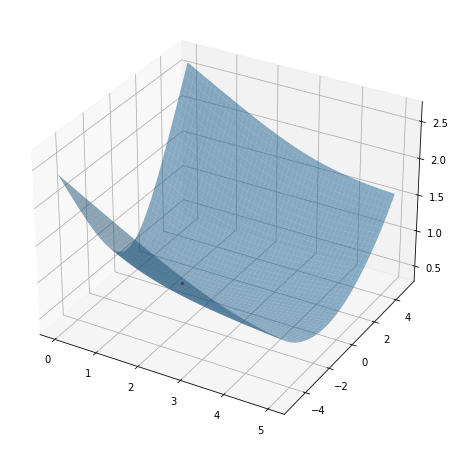

In [31]:
def logloss(w1,w0):
    y_pred = sigmoid(w1*X + w0)
    return log_loss(y,y_pred)

coefs_a = np.linspace(0,5,100)
coefs_b = np.linspace(-5,5,100)
w1,w0 = np.meshgrid(coefs_a,coefs_b)
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111,projection = '3d')
zs = np.array([logloss(i,j) for i,j in zip(np.ravel(w1),np.ravel(w0))])
Z = zs.reshape(w1.shape)
ax.plot_surface(w1,w0,Z,alpha = .5)
ax.scatter(model_a,model_b,logloss(model_a,model_b),c = 'r',s = 5)


### график logloss от весов

In [32]:
X = np.c_[np.ones_like(X),X]

In [33]:
#Сигмоида
def sigmoid(x):
    return 1/(1+np.exp(-x))
#Метрика logloss
def logloss(y,y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_1 + logloss_0)/len(y)
    return logloss_total
#Градиент logloss.
def gr_logloss(X,W,y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

### Реализация градиентного спуска
$a_{k+1} = a_k - \nabla F(a_k) \cdot \text{learning_rate}$

In [34]:
eps = 0.0001
np.random.seed(9)
W = np.random.randn(X.shape[1])

learning_rate = 0.001
next_W = W
n = 250
for i in range(n):
    cur_W = next_W
    next_W = cur_W - learning_rate*gr_logloss(X,curr_W,y)
    
    if np.linalg.norm(next_W - curr_W) <= eps:
        break
        
    if i%80 == 0:
        print(f"Итерация {i}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba>=0.5,1,0)
        accuracy = (y_class == y).sum()/len(y)
        print(f"LogLoss {logloss(y,y_proba)}")
        print(f"Accuracy {accuracy}")
        print('___________________________________________')
        
        model_grad = next_W @ X.T
        plt.figure(figsize = (10,2))
        plt.subplot(121)
        plt.scatter(X[:,1],np.zeros(X.shape[0]),c = y,s = 100,edgecolor = 'black')
        plt.plot(X[:,1],model_grad,linewidth = 2,c='r',label = 'gradient')
        plt.title(f"iter {i}")
        plt.subplot(122)
        x_ones = np.c_[np.ones_like(x),x]
        model_pred_x = next_W @ x_ones.T
        
        plt.scatter(X[:,1],sigmoid(model_grad) >= 0.5,c = y,s = 100,edgecolor = 'black')
        plt.plot(x,sigmoid(model_pred_x),linewidth = 2,c='r')
        plt.xlim(-3,1.5)
        plt.title(f"sigmoid")
        

NameError: name 'curr_W' is not defined

In [ ]:
grad_model = next_W[1]*x + next_W[0]
plt.plot(x,sigmoid(grad_model),color = 'r')
plt.plot(x,sigmoid(model_y_sk),color = 'blue',linestyle='--')